# Explore here

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Cargar las variables del archivo .env
load_dotenv()

True

In [3]:
# Obtener CLIENT_ID y CLIENT_SECRET del entorno
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

con = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))
artist_id = '4gzpq5DPGxSnKTe4SA8HAU' #COLDPLAY

In [4]:
response = con.artist_top_tracks(artist_id)
if response:
  tracks = response["tracks"]
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True, ascending=False)

tracks_df.head(3))

,duration_ms,name,popularity
0,4.446217,Yellow,89
1,4.039550,Viva La Vida,86
2,4.119333,Something Just Like This,86


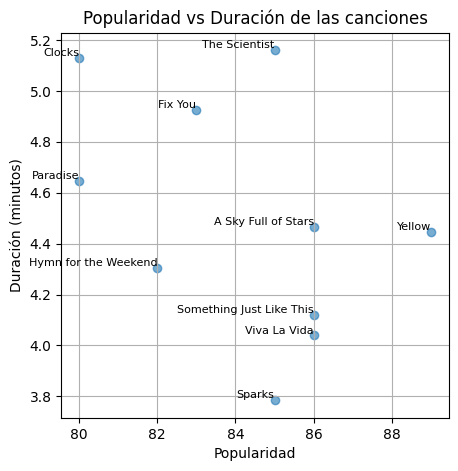

In [11]:
# VISUALIZACIÓN
plt.figure(figsize=(5, 5))
plt.scatter(tracks_df["popularity"], tracks_df["duration_ms"], alpha=0.6)
plt.title('Popularidad vs Duración de las canciones')
plt.xlabel('Popularidad')
plt.ylabel('Duración (minutos)')
plt.grid(True)

#etiquetas con los nombres de las canciones
for i, row in tracks_df.iterrows():
    plt.text(row["popularity"], row["duration_ms"], row["name"], fontsize=8, ha='right', va='bottom')

plt.show()

In [12]:
#No se logra apreciar una clara relacion entre la duracion y la popularidad de una cancion.
#Las cuatro canciones mas populares de Coldplay (yellow, a sky full of stars, something just like this y viva la vida)comparten un intervalo de duracion entre 4,0 - 4,6 minutos.